In [1]:
import pandas as pd
import seaborn as sns
import simulation as sim
import plot as pl
import utilities as u
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style("ticks")

## Figure 3: Thermo-hydrolysis rate

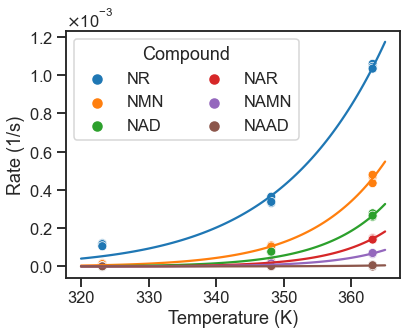

In [2]:
drates = pd.read_csv('../data/arrehnius_parameters.csv', sep='\t')
pl.plot_thermolysis(drates, save=True, figsize=(6,5), filename='../../Thermophiles/paper/figures/submission/Figure3.png')

## Figure 4: ATP consumption per NAD production at different temperature

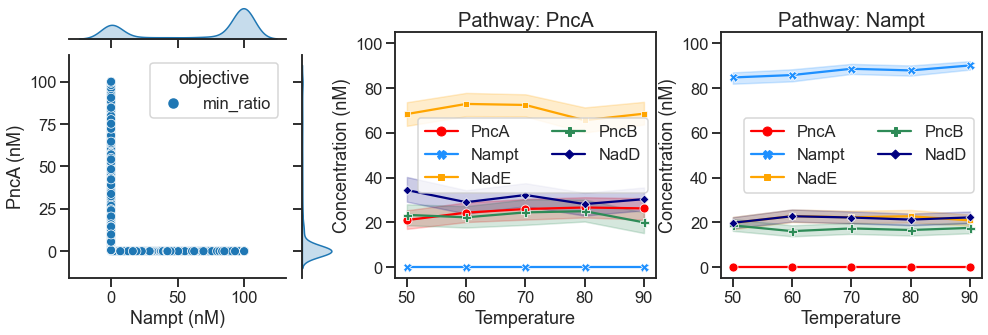

In [3]:
# Figure 4A, 4B and 4C
df_ = u.prepET(filepath_optET='../data/new_PN_Keq_min_ratio_1_123.csv', objective='min_ratio')
scaling = 1e-10 * 1e-3 * 1e9
pl.subplots(df_, scaling=scaling, objective='min_ratio', ylim1=[-5, 105], ylim2=[-5, 105])

In [4]:
# df_ = df_.drop('Sol', axis=1)
# pl.plot_corr(dfP=df_[df_.pathway=='PncA'], dfN=df_[df_.pathway=='Nampt'], filename='../images/corr_optimisedET_min_ratio.png')

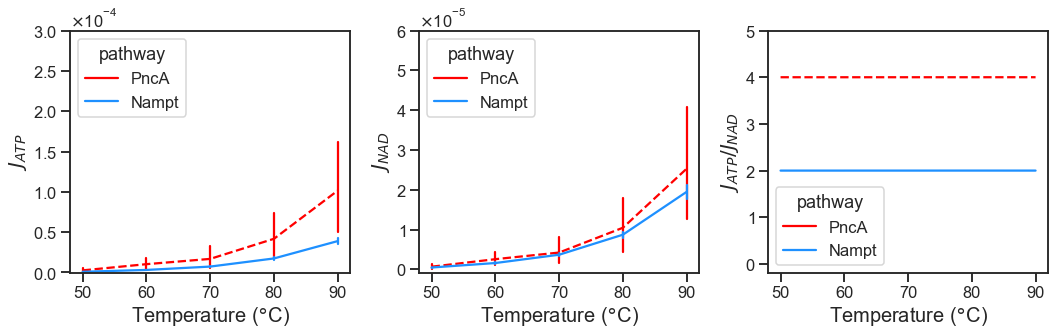

In [5]:
F = pd.read_csv('../data/new_Flux_min_ratio.csv', sep='\t', index_col=0)
F = sim.calculateATPconsFlux(F).reset_index()
F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
cols = ['PNCA', 'NAPRT', 'NMNAT1-NaMN', 'NADS', 'SIRT', 'NAMPT', 'NMNAT1-NMN',
        'NT5-NaMN', 'NT5-NMN', 'NRK1-NMN', 'PNP-NR', 'NRK1-NaMN', 'PNP-NAR',
        'NMN thermolysis', 'NaMN thermolysis', 'NAR thermolysis',
        'NR thermolysis', 'NAD thermolysis', 'ATP consumption', 'NAD production', 'ATPconsNADprod',
        'pathway', 'objective']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
lp = sns.lineplot(data=F, x=F.temperature, y='ATP consumption', hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[0], err_style='bars')
lp.lines[0].set_linestyle('dashed')
ax[0].set_ylabel('$J_{ATP}$', fontsize=20)
ax[0].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[0].ticklabel_format(style='scientific', axis='y',
                       scilimits=(-3, 6), useMathText=True)
ax[0].set_ylim([-1e-6, 3e-4])
ax[0].legend(loc='upper left', title='pathway')

lp = sns.lineplot(data=F, x=F.temperature, y='NAD production', hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[1], err_style='bars')
lp.lines[0].set_linestyle('dashed')
ax[1].set_ylabel('$J_{NAD}$', fontsize=20)
ax[1].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[1].ticklabel_format(style='scientific', axis='y',
                       scilimits=(-5, 6), useMathText=True)
# ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[1].set_ylim([-1e-6, 6e-5])
ax[1].legend(loc='upper left', title='pathway')

lp = sns.lineplot(data=df_, x=df_.Temperature, y=df_.Sol, hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[2], err_style='bars')
lp.lines[0].set_linestyle('dashed')
ax[2].set_ylabel('$J_{ATP}/J_{NAD}$', fontsize=20)
ax[2].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[2].ticklabel_format(style='scientific', axis='y',
                       scilimits=(-4, 1), useMathText=True)
ax[2].set_ylim([-2e-1, 5])
ax[2].legend(loc='lower left', title='pathway')
plt.tight_layout()
fig.savefig('../images/flux_min_ratio_1.png', dpi=300)


# Figure 5

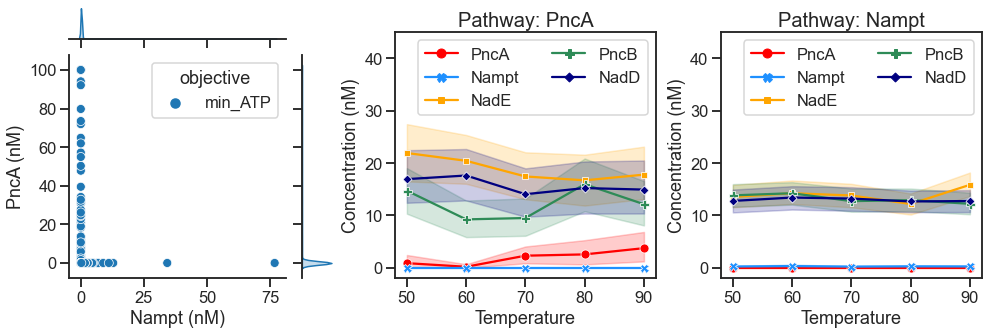

In [6]:
# Figure 5A, 4B and 4C
df_ = u.prepET(filepath_optET='../data/new_PN_Keq_min_ATP_1.csv', objective='min_ATP')
scaling = 1e-10 * 1e-3 * 1e9
pl.subplots(df_, scaling=scaling, objective='min_ATP', ylim1=[-2, 45], ylim2=[-2, 45])

In [7]:
# df_ = df_.drop('Sol', axis=1)
# pl.plot_corr(dfP=df_[df_.pathway=='PncA'], dfN=df_[df_.pathway=='Nampt'], filename='../images/corr_optimisedET_min_ATP.png')

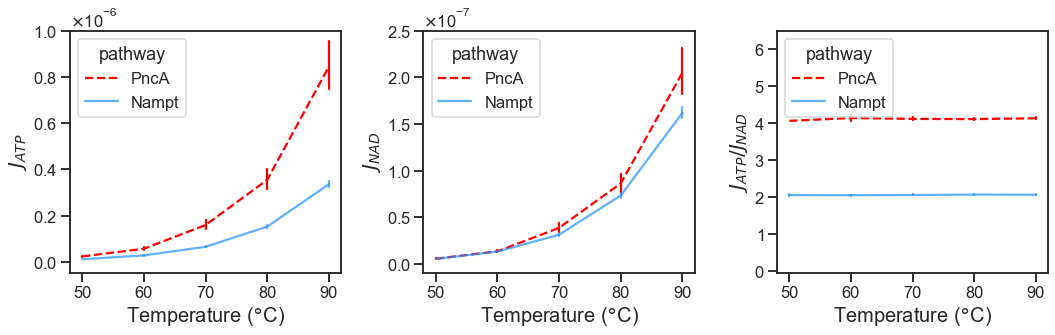

In [8]:
# Figure 5D, 5E and 5F
F = pd.read_csv('../data/new_Flux_min_ATP_1.csv', sep='\t', index_col=0)
pl.subplot_fluxes(F, ylim1=[-5e-8, 1e-6], ylim2=[-1e-8, 2.5e-7], ylim3=[-0.05, 6.5], save=True, filename='../images/flux_min_ATP_1.png')

# Figure 6

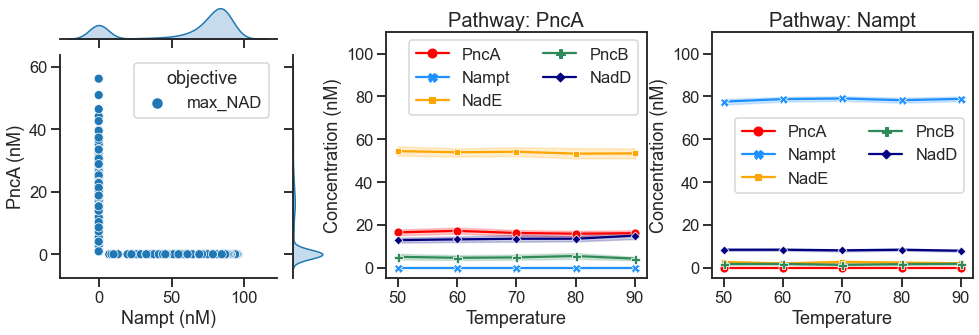

In [9]:
# Figure 6A, 4B and 4C
df_ = u.prepET(filepath_optET='../data/new_PN_Keq_max_NAD_1.csv',
               objective='max_NAD')
scaling = 1e-10 * 1e-3 * 1e9
pl.subplots(df_, scaling=scaling, objective='max_NAD',
            ylim1=[-5, 110], ylim2=[-5, 110])

In [10]:
# df_ = df_.drop('Sol', axis=1)
# pl.plot_corr(dfP=df_[df_.pathway=='PncA'], dfN=df_[df_.pathway=='Nampt'], filename='../images/corr_optimisedET_max_NAD.png')

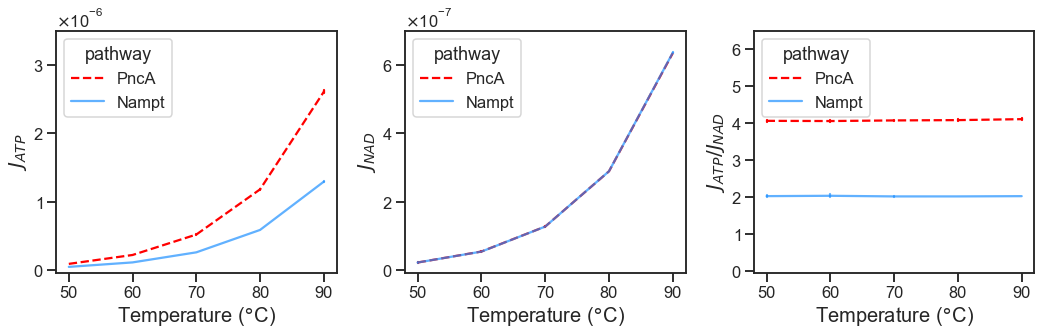

In [11]:
# Figure 6D, 6E and 6F
F = pd.read_csv('../data/fluxes_max_NAD_1.csv', sep='\t', index_col=0)
pl.subplot_fluxes(F, ylim1=[-5e-8, 3.5e-6], ylim2=[-1e-8, 7e-7], ylim3=[-0.05, 6.5])#, save=True, filename='../images/flux_max_NAD_1.png')


# Figure S1

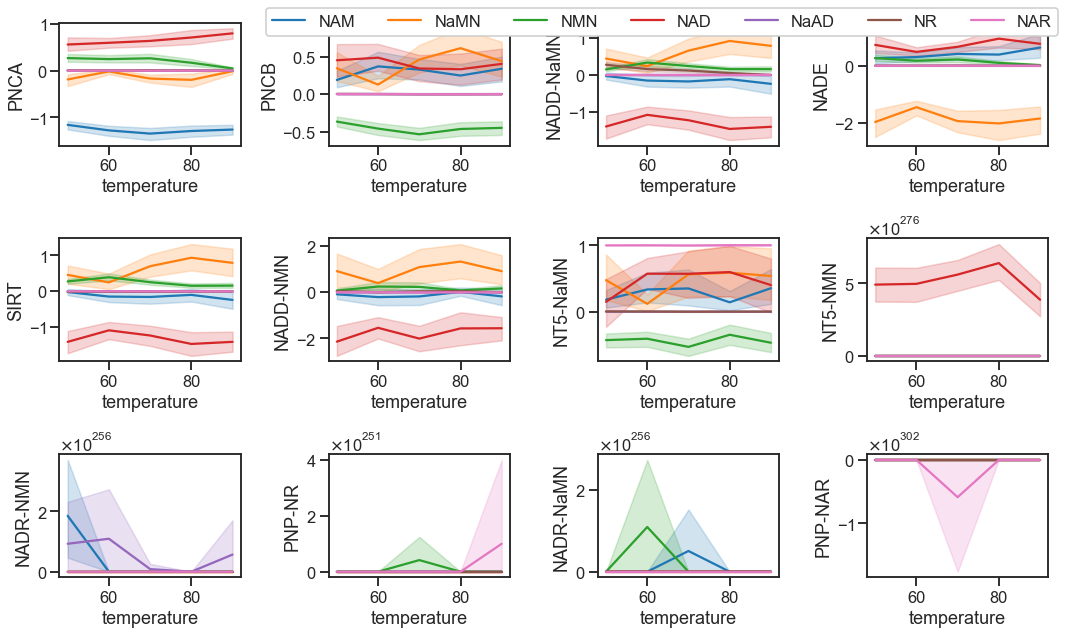

In [12]:
CC_PNCA = pd.read_csv('../data/CC_PNCA.csv', sep='\t', index_col=0)
pl.controlcoefficients(CC=CC_PNCA.drop('NAMPT', axis=1), save=True, filename='../../Thermophiles/paper/figures/submission/FigureS1.png')


# Figure S2

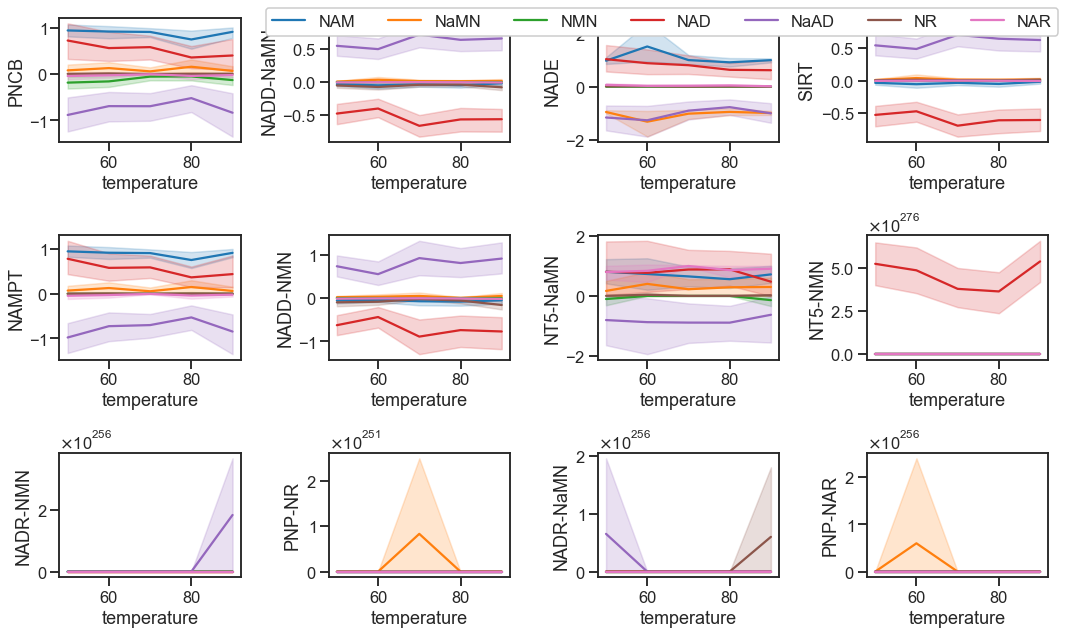

In [13]:
CC_PNCA = pd.read_csv('../data/CC_NAMPT.csv', sep='\t', index_col=0)
pl.controlcoefficients(CC=CC_PNCA.drop('PNCA', axis=1), save=True,
                       filename='../../Thermophiles/paper/figures/submission/FigureS2.png')


# Figure S3

In [14]:
def subplots_concentration(df, layout: tuple, figsize: tuple, xlabel='Temperature ($\degree$C)', color='blue',
                           palette=['#FF0000', '#1E90FF'], **kwargs):
    mets = [i+' (mM)' for i in ['NAD', 'NA', 'NAMN',
                                'NR', 'NAM', 'NMN', 'NAAD', 'NAR']]
    fig, axn = plt.subplots(layout[0], layout[1], figsize=figsize, sharex=kwargs.get(
        'sharex', False), sharey=kwargs.get('sharey', False))
    for i, ax in enumerate(axn.flat):
        # if i < len(df.columns):
        lp = sns.lineplot(data=df[df.pathway == 'PncA'], x=df[df.pathway == 'PncA'].temperature, y=mets[i],
                            ax=ax, err_style='bars', label='PncA', color='#FF0000')
        lp.lines[0].set_linestyle('dashed')

        lp = sns.lineplot(data=df[df.pathway == 'Nampt'], x=df[df.pathway == 'Nampt'].temperature, y=mets[i],
                        ax=ax, err_style='bars', alpha=0.7, label='Nampt', color='#1E90FF', dashes=[(2, 2), (2, 2)])
        # if kwargs.get('sharey', False) == True:
        #     lp.set(xlabel=xlabel)
        #     ax.set_title(df.columns[i])
        # else:
        #     lp.set(xlabel=xlabel, ylabel=mets[i])
        # else:
        #     break
        ax.ticklabel_format(style='scientific', axis='y',
                            scilimits=(-1, 1), useMathText=True)
        # if mets[i] in [j+' (mM)' for j in ['NAD', ]]:
        #     ax.set_ylim([-5e-4, 5e-1])
        # elif mets[i] in [j+' (mM)' for j in ['NMN', ]]:
        #     ax.set_ylim([-5e-4, 5e-2])

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', framealpha=1.0)
    plt.tight_layout()
    if 'filename' in kwargs:
        fig.savefig(kwargs['filename'], dpi=300)
    return plt.show()


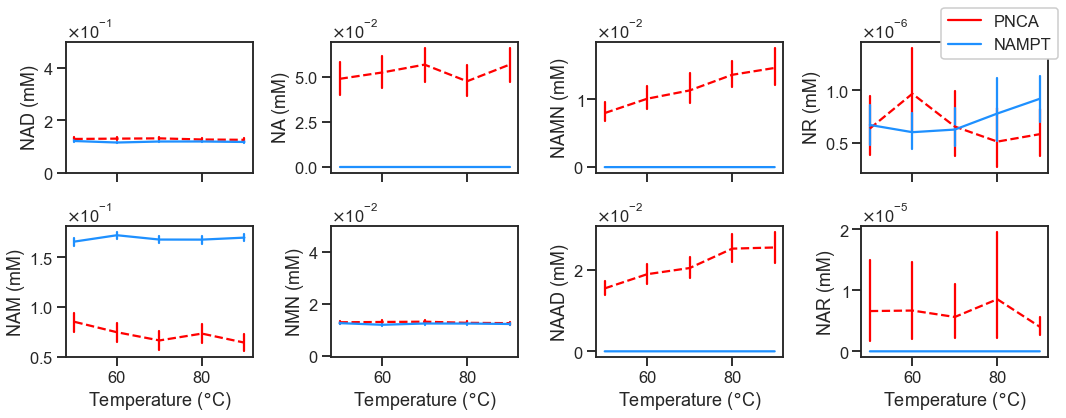

In [15]:
# Figure S3(A)
C = pd.read_csv('../data/new_Conc_min_ratio_1_123.csv', sep='\t')
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR']
C = C.rename(columns={i: i+' (mM)' for i in mets})
pl.subplots_concentration(df=sim.u.dropConstantCol(C), layout=(2, 4), figsize=(15, 6),
                          hue='pathway', sharex=True)

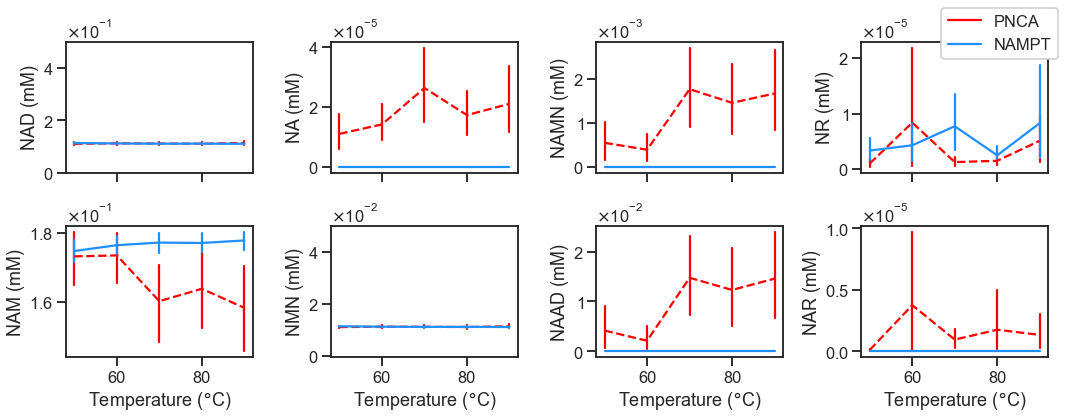

In [16]:
# Figure S3(B)
C = pd.read_csv('../data/new_Conc_min_ATP_1.csv', sep='\t', index_col=0)
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR', 'pathway']
C = C.rename(columns={i: i+' (mM)' for i in mets[:-1]}).reset_index()
pl.subplots_concentration(df=sim.u.dropConstantCol(C), layout=(2, 4), figsize=(15, 6),
                          hue='pathway', sharex=True)


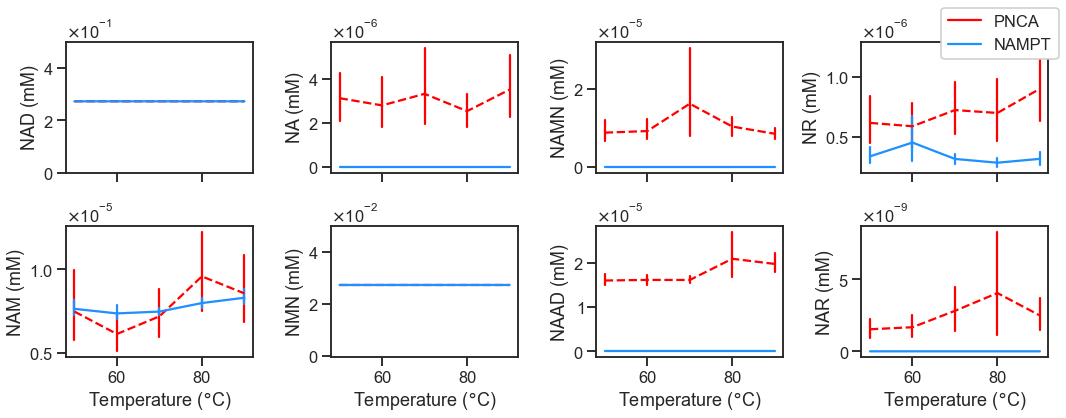

In [17]:
# Figure S3(C)
C = pd.read_csv('../data/concentrations_max_NAD_1.csv', sep='\t', index_col=0)
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR', 'pathway']
C = C.rename(columns={i: i+' (mM)' for i in mets[:-1]})
pl.subplots_concentration(df=sim.u.dropConstantCol(C.reset_index()), layout=(2, 4), figsize=(15, 6),
                          hue='pathway', sharex=True)
